In [43]:
from typing import Any
import numpy as np
import random

class RandomWalk:
    def __init__(self) -> None:
        self.state = 2
        pass
    
    def action_space(self):
        return 2
    
    def state_space(self):
        return 5
    
    def reset(self):
        self.state = 2
        return self.state
    
    def step_(self, action):
        new_state = self.state + (-1 if action == 0 else 1)
        reward = 1 if new_state == 5 else 0
        terminated = new_state == -1 or new_state == 5
        self.state = 2 if terminated else new_state
        return terminated, reward, new_state
    
    def step(self):
        return self.step_(random.choice(range(2)))
        
def td0_evaluating_state_values_batch_updating(env, num_episodes, alpha, gamma = 1.0, callback = None):
    num_states = env.state_space()
    num_actions = env.action_space()
    values = np.full(num_states,0.5,dtype=float)
    episodes = []
    for episode in range(num_episodes):
        states=[]
        rewards=[]
        state = env.reset()
        while True:
            terminated, reward, new_state = env.step()
            states.append(state)
            rewards.append(reward)
            state = new_state
            if terminated:
                break
        episodes.append((states,rewards))

        while True:
            old_values = values.copy()
            for episode in episodes:
                states = episode[0]
                rewards = episode[1]
                episode_len = len(rewards)
                for t in range(episode_len):
                    state = states[t]
                    reward = rewards[t]
                    v_prime = 0 if episode_len == t + 1 else values[states[t+1]]
                    values[state] += (reward + gamma * v_prime - values[state]) * alpha
            if(np.abs(old_values-values).sum() < 1e-3):
                break
        if callback:
            callback(values)
    return values

def montecaro_evaluating_state_values_batch_updating(env, num_episodes, alpha, gamma = 1.0, callback = None):
    num_states = env.state_space()
    num_actions = env.action_space()
    values = np.full(num_states,0.5,dtype=float)
    episodes = []
    for episode in range(num_episodes):
        states=[]
        rewards=[]
        state = env.reset()
        while True:
            terminated, reward, new_state = env.step()
            states.append(state)
            rewards.append(reward)
            state = new_state
            if terminated:
                break
        episodes.append((states,rewards))
        while True:
            old_values = values.copy()
            for episode in episodes:
                states = episode[0]
                rewards = episode[1]
                episode_len = len(rewards)
                g = 0
                for t in range(episode_len-1,-1,-1):
                    state = states[t]
                    reward = rewards[t]
                    g = reward + g * gamma
                    values[state] += (g - values[state]) * alpha
            if(np.abs(old_values-values).sum() < 1e-3):
                break
        if callback:
            callback(values)
    return values

class CalcError:
    def __init__(self, num_states, mses):
        self.true_values = np.zeros(num_states, dtype=float)
        self.true_values[:] = [float(n+1)/(num_states+1) for n in range(num_states)]
        self.mses = mses

    def calc_mse(self, values):
        return np.sqrt(np.power(self.true_values - values, 2).mean())
    
    def __call__(self, values):
        self.mses.append(self.calc_mse(values))


0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29
29 30
30 31
31 32
32 33
33 34
34 35
35 36
36 37
37 38
38 39
39 40
40 41
41 42
42 43
43 44
44 45
45 46
46 47
47 48
48 49
49 50
50 51
51 52
52 53
53 54
54 55
55 56
56 57
57 58
58 59
59 60
60 61
61 62
62 63
63 64
64 65
65 66
66 67
67 68
68 69
69 70
70 71
71 72
72 73
73 74
74 75
75 76
76 77
77 78
78 79
79 80
80 81
81 82
82 83
83 84
84 85
85 86
86 87
87 88
88 89
89 90
90 91
91 92
92 93
93 94
94 95
95 96
96 97
97 98
98 99
99 100
0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8
8 9
9 10
10 11
11 12
12 13
13 14
14 15
15 16
16 17
17 18
18 19
19 20
20 21
21 22
22 23
23 24
24 25
25 26
26 27
27 28
28 29
29 30
30 31
31 32
32 33
33 34
34 35
35 36
36 37
37 38
38 39
39 40
40 41
41 42
42 43
43 44
44 45
45 46
46 47
47 48
48 49
49 50
50 51
51 52
52 53
53 54
54 55
55 56
56 57
57 58
58 59
59 60
60 61
61 62
62 63
63 64
64 65
65 66
66 67
67 68
68 69
69 70
70 71
71 72
72 73

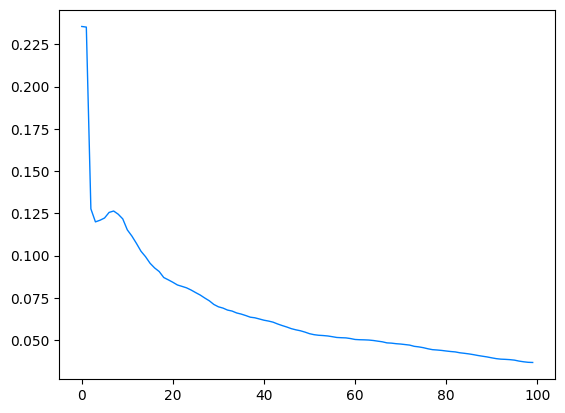

In [44]:
import matplotlib.pyplot as plt
env = RandomWalk()
num_states = env.state_space()

params = [
    [td0_evaluating_state_values_batch_updating, 0.001, "-", "#0080FF"],
    #[montecaro_evaluating_state_values_batch_updating, 0.001, "-", "#FF0000"],
]

num_episodes = 100
for param in params:
    mmse = np.zeros(num_episodes,dtype=float)
    for n in range(100):
        mses = []
        calc_error = CalcError(num_states, mses)
        param[0](env, num_episodes, param[1], callback=calc_error)
        mmse[:] += mses
    mmse /= 100
    plt.plot(range(num_episodes), mmse, param[2], color=param[3], linewidth = 1)


